<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2020/blob/master/day-06/MLDM_2020_seminar06_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

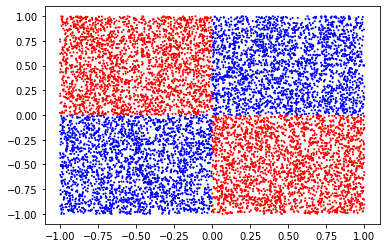

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

Max Depth: 1, Accuracy: 0.5061


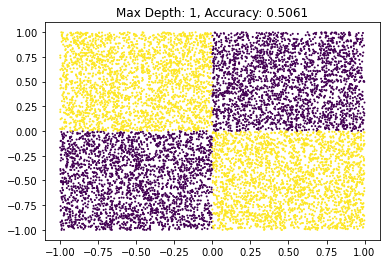

Max Depth: 2, Accuracy: 0.5459


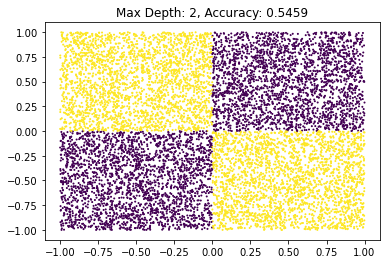

Max Depth: 3, Accuracy: 0.943


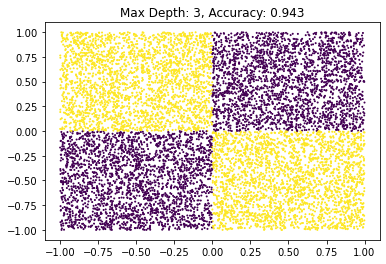

Max Depth: 4, Accuracy: 0.9994


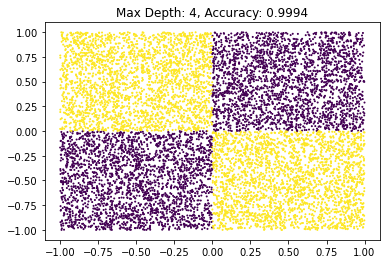

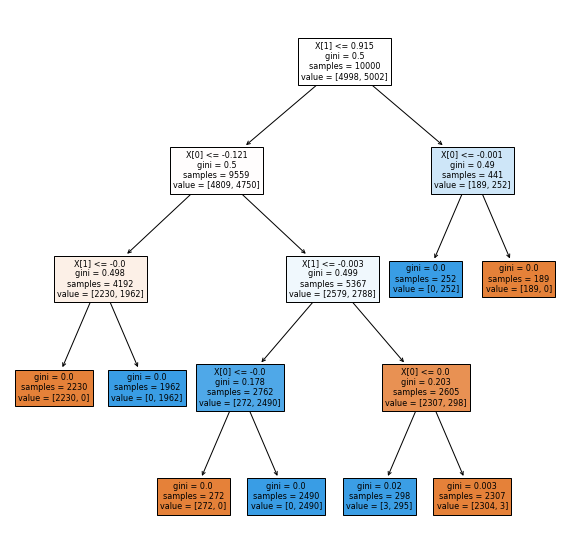

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

N = 10000
num_features_total = 2

np.random.seed(42)
X = np.random.uniform(-1, 1, size=(N, num_features_total))
y = np.logical_xor(X[:, 0] >= 0, X[:, 1] >= 0)

depth = 1
while True:
    clf = DecisionTreeClassifier(random_state=0, max_depth=depth)
    clf.fit(X, y)
    accuracy = clf.score(X,y)
    print(f"Max Depth: {depth}, Accuracy: {accuracy}")
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.title(f"Max Depth: {depth}, Accuracy: {accuracy}")
    plt.show()
    if accuracy > 0.99:
        fig, ax = plt.subplots(figsize=(10, 10))
        plot_tree(clf, filled=True,  ax=ax)
        break
    else:
        depth += 1

# Task 2 (3 points)

Consider the following dataset:

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names).astype(np.float16)
y = data.target_names[data.target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [3]:
model_one = DecisionTreeClassifier(
    class_weight={'malignant' : 2., 'benign' : 1.}, 
    splitter="best", criterion = 'gini', 
    random_state = 0, 
    min_samples_split=15,
    min_samples_leaf=12,
)
model_one.fit(X_train, y_train)
print(f"Model One Accuracy: {model_one.score(X_test, y_test)}")


model_two = DecisionTreeClassifier(
    class_weight={'malignant' : 2., 'benign' : 1.}, 
    splitter="random", 
    criterion = 'entropy', 
    random_state = 0, 
    min_samples_split=15,
)
model_two.fit(X_train, y_train)
print(f"Model Two Accuracy: {model_two.score(X_test, y_test)}")

Model One Accuracy: 0.9090909090909091
Model Two Accuracy: 0.9370629370629371


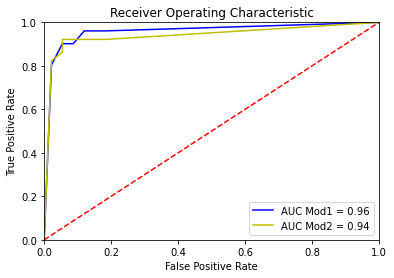

In [4]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs_one = model_one.predict_proba(X_test)
preds_one = probs_one[:,1]
fpr_one, tpr_one, threshold_one = metrics.roc_curve(y_test, preds_one, pos_label='malignant')
roc_auc_one = metrics.auc(fpr_one, tpr_one)

# calculate the fpr and tpr for all thresholds of the classification
probs_two = model_two.predict_proba(X_test)
preds_two = probs_two[:,1]
fpr_two, tpr_two, threshold_two = metrics.roc_curve(y_test, preds_two, pos_label='malignant')
roc_auc_two = metrics.auc(fpr_two, tpr_two)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_one, tpr_one, 'b', label = 'AUC Mod1 = %0.2f' % roc_auc_one)
plt.plot(fpr_two, tpr_two, 'y', label = 'AUC Mod2 = %0.2f' % roc_auc_two)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()